<a href="https://colab.research.google.com/github/MARCOBRAYANGONZALEZGONZALEZ/EDP-I-EJERCICIOS-/blob/main/Cuerda_vibratoria_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

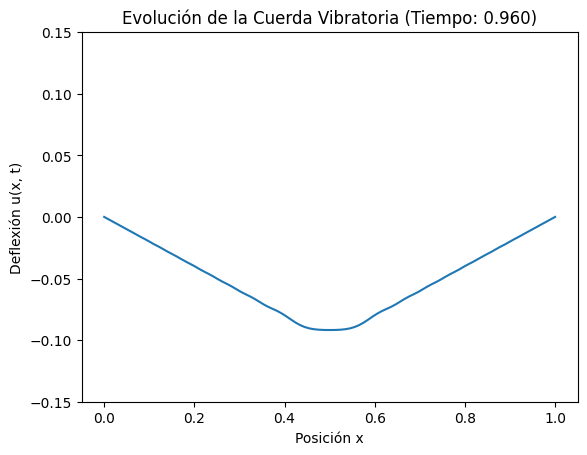

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0  # Longitud de la cuerda
k = 0.1  # Amplitud máxima de la deflexión inicial
c = 1.0  # Velocidad de propagación de la onda (sqrt(T/rho))

# Función de deflexión inicial triangular
def initial_deflection(x, L, k):
    if 0 <= x <= L/2:
        return (2 * k * x) / L
    elif L/2 < x <= L:
        return (2 * k * (L - x)) / L
    else:
        return 0

# Discretización espacial y temporal
Nx = 100  # Número de puntos espaciales
Nt = 200  # Número de pasos de tiempo
dx = L / (Nx - 1)
dt = 0.5 * dx / c # Criterio de estabilidad de Courant

# Mallado espacial
x = np.linspace(0, L, Nx)

# Condiciones iniciales (u(x, 0) = f(x), du/dt(x, 0) = 0)
u = np.zeros((Nt, Nx))
u_prev = np.zeros(Nx)
u_curr = np.zeros(Nx)

for i in range(Nx):
    u_prev[i] = initial_deflection(x[i], L, k)

u[0, :] = u_prev


u_curr[1:-1] = u_prev[1:-1] + 0.5 * (c * dt / dx)**2 * (u_prev[2:] - 2 * u_prev[1:-1] + u_prev[:-2])
u[1, :] = u_curr

# Para los pasos de tiempo subsiguientes (n >= 1)
for n in range(1, Nt - 1):
    u_next = np.zeros(Nx)
    # Aplicar el esquema de diferencias finitas para los puntos interiores
    u_next[1:-1] = 2 * u_curr[1:-1] - u_prev[1:-1] + (c * dt / dx)**2 * (u_curr[2:] - 2 * u_curr[1:-1] + u_curr[:-2])

    # Condiciones de frontera (extremos fijos, u(0, t) = 0, u(L, t) = 0)
    u_next[0] = 0
    u_next[-1] = 0

    # Actualizar para el próximo paso de tiempo
    u_prev = u_curr.copy()
    u_curr = u_next.copy()
    u[n+1, :] = u_curr

# Visualización (opcional)
fig, ax = plt.subplots()
line, = ax.plot(x, u[0, :])
ax.set_ylim([-k * 1.5, k * 1.5]) # Ajustar límites para mejor visualización
ax.set_xlabel('Posición x')
ax.set_ylabel('Deflexión u(x, t)')
ax.set_title('Evolución de la Cuerda Vibratoria con Deflexión Triangular')

# Animación (requiere IPython.display)
from IPython.display import display, clear_output
import time

for n in range(0, Nt, 10): # Mostrar cada 10 pasos de tiempo para acelerar la visualización
    line.set_ydata(u[n, :])
    ax.set_title(f'Evolución de la Cuerda Vibratoria (Tiempo: {n * dt:.3f})')
    display(fig)
    clear_output(wait=True)
    time.sleep(0.01) # Pausa corta para la animación

plt.close(fig) # Cerrar la figura al finalizar


